<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Soltani

**Student ID**: 400101356



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

## Write your code here ##
The Boston Housing Dataset is a popular dataset used in machine learning and regression analysis⁴. It contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts². The dataset has **506 samples**¹³.

The dataset consists of **13 input features** and a **target variable (MEDV)**³. Here are the features:

1. **CRIM**: Per capita crime rate by town
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: Proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX**: Nitric oxides concentration (parts per 10 million)
6. **RM**: Average number of rooms per dwelling
7. **AGE**: Proportion of owner-occupied units built prior to 1940
8. **DIS**: Weighted distances to five Boston employment centres
9. **RAD**: Index of accessibility to radial highways
10. **TAX**: Full-value property-tax rate per $10,000
11. **PTRATIO**: Pupil-teacher ratio by town
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**: % lower status of the population

The target variable, **MEDV**, represents the median value of owner-occupied homes in $1000's².

So, the shape of the dataset is **(506, 14)**, including the target variable. Please note that the actual shape of your provided **boston.csv** file might be different. You can check it using pandas' `shape` attribute after loading the csv file. 

Source: Conversation with Bing, 5/3/2024
(1) GitHub - margaret-rozario/Boston-Housing: The Boston Housing dataset is .... https://github.com/margaret-rozario/Boston-Housing.
(2) Boston Dataset - Department of Computer Science, University of Toronto. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.
(3) Boston Housing Dataset Example - Google Colab. https://colab.research.google.com/github/ds4m/ds4m.github.io/blob/master/chapter-8-resources/boston-dataset-example.ipynb.
(4) Boston Housing Analysis - GitHub. https://github.com/sminerport/boston-housing-analysis.
(5) undefined. http://lib.stat.cmu.edu/datasets/boston.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [5]:
## Write your code here ##

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print R^2 and RMSE for the training set
print("Training set:")
print("R^2: ", r2_score(y_train, y_train_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Calculate and print R^2 and RMSE for the testing set
print("\nTesting set:")
print("R^2: ", r2_score(y_test, y_test_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Print the coefficients of the model
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Training set:
R^2:  0.7508856358979672
RMSE:  4.6520331848801675

Testing set:
R^2:  0.6687594935356316
RMSE:  4.9286021826653394

Coefficients:
CRIM: -0.11305592398537878
ZN: 0.030110464145645294
INDUS: 0.040380720413337526
CHAS: 2.784438203507853
NX: -17.202633391781273
RM: 4.438835199513052
AGE: -0.006296362210983559
DIS: -1.4478653685307885
RAD: 0.26242973558508553
TAX: -0.010646786275308497
PTRATIO: -0.9154562404680762
B: 0.012351334729968397
LSTAT: -0.5085714244487939


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [8]:
## Write your code here ##


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the alphas parameter

alphas = 10*np.abs(np.linspace(3,-3,100))*0.5

# Train a Ridge Regression model for each alpha and print the coefficients
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and print R^2 and RMSE for the training set
    print(f"\nAlpha: {alpha}")
    print("Training set:")
    print("R^2: ", r2_score(y_train, y_train_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

    # Calculate and print R^2 and RMSE for the testing set
    print("Testing set:")
    print("R^2: ", r2_score(y_test, y_test_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Print the coefficients of the model
    print("Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef}")



Alpha: 15.0
Training set:
R^2:  0.7403709219577232
RMSE:  4.749195904944873
Testing set:
R^2:  0.6656403370970094
RMSE:  4.951753125599719
Coefficients:
CRIM: -0.10759890462574469
ZN: 0.03626969921811595
INDUS: -0.029828256502089326
CHAS: 1.5907392964026386
NX: -1.3031862566134282
RM: 4.034295549229673
AGE: -0.014306177201856054
DIS: -1.2239787847123829
RAD: 0.2532723199323633
TAX: -0.013019653111896142
PTRATIO: -0.764824798818175
B: 0.012787842799923316
LSTAT: -0.5751427801785368

Alpha: 14.696969696969697
Training set:
R^2:  0.7404468968403846
RMSE:  4.748500978928251
Testing set:
R^2:  0.6655306729488173
RMSE:  4.952565103433833
Coefficients:
CRIM: -0.10756981959690345
ZN: 0.03623144849966076
INDUS: -0.02965336083058795
CHAS: 1.6025174514491556
NX: -1.328221728287363
RM: 4.043771832578975
AGE: -0.0143739412104356
DIS: -1.2243869964093166
RAD: 0.2529592201271222
TAX: -0.013004993937526535
PTRATIO: -0.7645593221903805
B: 0.012791055990872999
LSTAT: -0.5743872997177165

Alpha: 14.3939

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

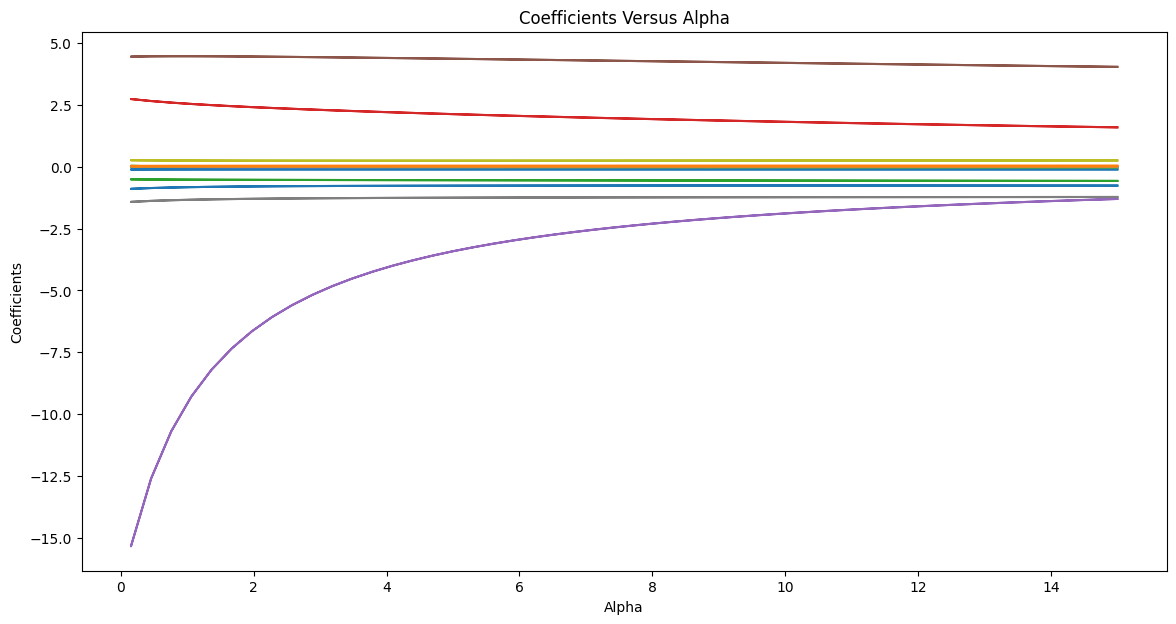

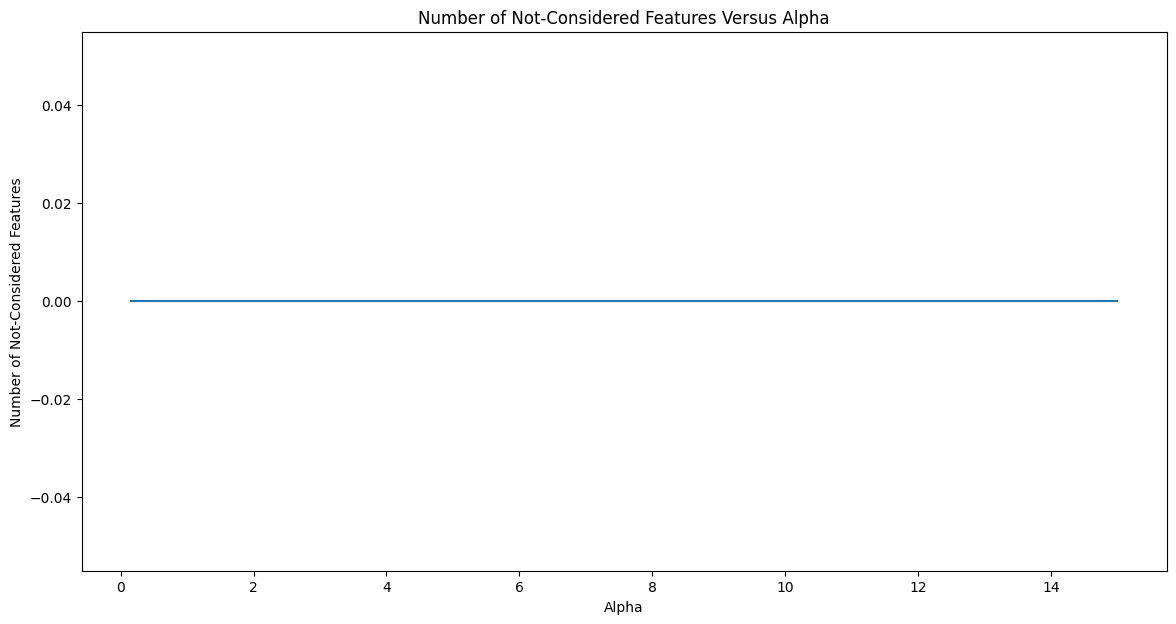

Optimal Alpha: 0.15151515151515138

Training set with optimal alpha:
MSE:  21.652198553179122
R^2:  0.7507614805238605

Testing set with optimal alpha:
MSE:  24.308591299385917
R^2:  0.6685212428459846

Coefficients with optimal alpha:
CRIM: -0.11209985349569516
ZN: 0.030620645981582983
INDUS: 0.032376375988098005
CHAS: 2.7341696240048474
NX: -15.337282687728573
RM: 4.448745611877633
AGE: -0.007765837992127906
DIS: -1.4212248312553961
RAD: 0.25895719702877945
TAX: -0.010841923751445373
PTRATIO: -0.8940420383315303
B: 0.012423002479331275
LSTAT: -0.5119912123006577


In [10]:
## Write your code here ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the alphas parameter
alphas = 10*np.abs(np.linspace(3,-3,100))*0.5

# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_coefs = []

# Train a Ridge Regression model for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store MSE for the training and testing sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients and count of zero coefficients
    coefficients.append(model.coef_)
    zero_coefs.append(np.sum(model.coef_ == 0))

# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.show()

# Find the optimal alpha (the one that gives the smallest test error)
optimal_alpha = alphas[np.argmin(test_errors)]
print(f"Optimal Alpha: {optimal_alpha}")

# Train a Ridge Regression model with the optimal alpha
model = Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)

# Make predictions with the optimal model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print MSE and R^2 for the training set
print("\nTraining set with optimal alpha:")
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R^2: ", r2_score(y_train, y_train_pred))

# Calculate and print MSE and R^2 for the testing set
print("\nTesting set with optimal alpha:")
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R^2: ", r2_score(y_test, y_test_pred))

# Print the coefficients of the model with the optimal alpha
print("\nCoefficients with optimal alpha:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

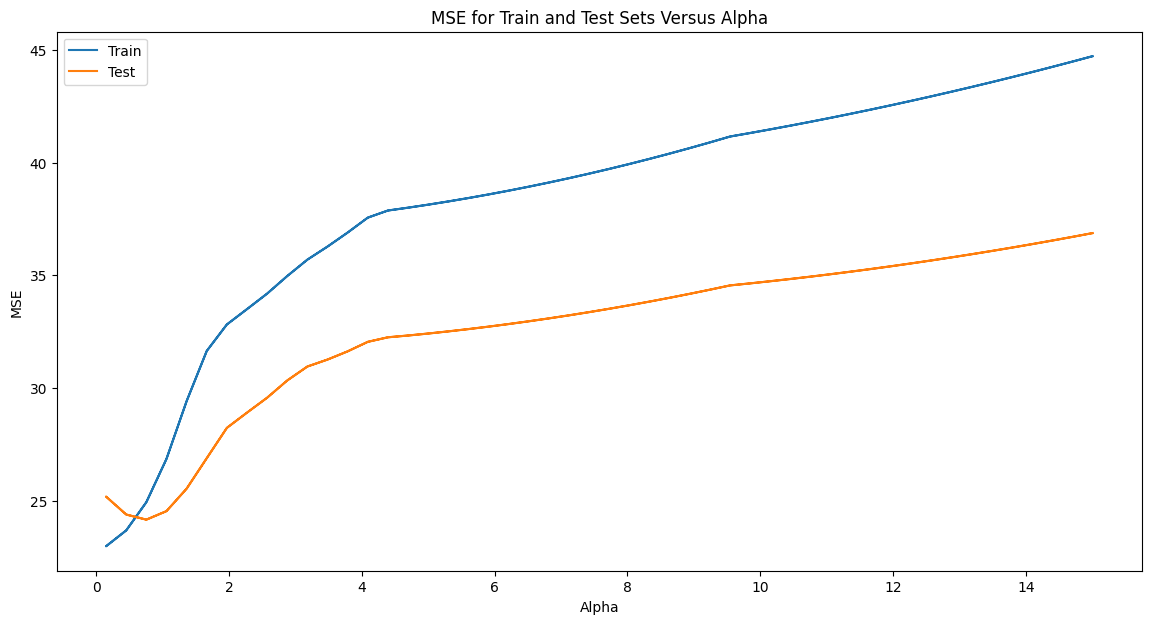

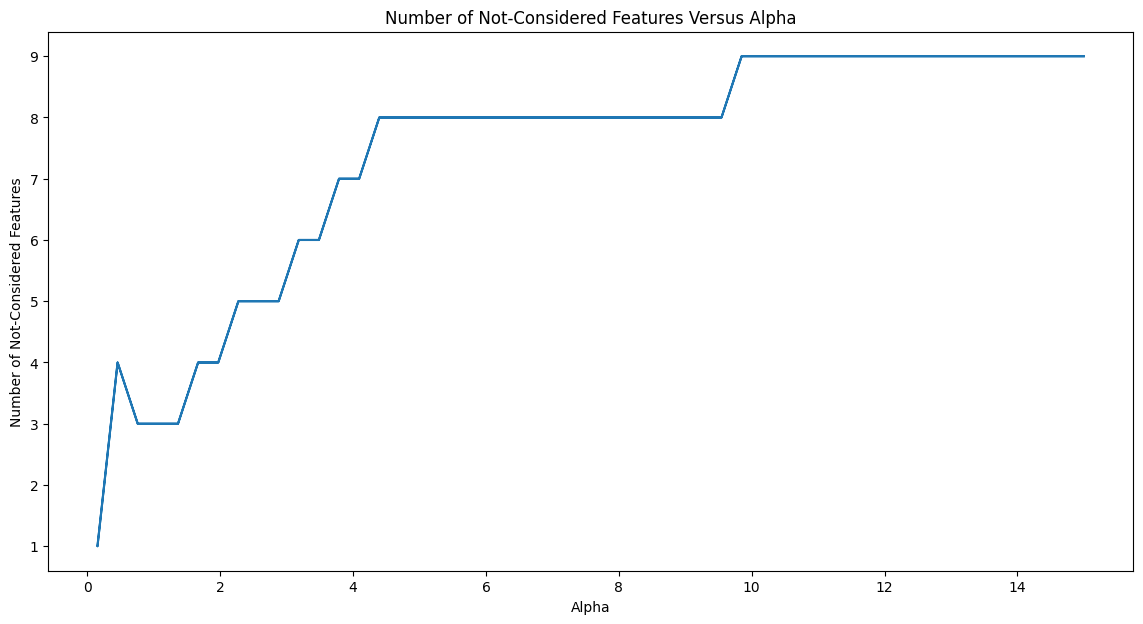

Optimal Alpha: 0.7575757575757569

Training set with optimal alpha:
MSE:  24.93170153687977
R^2:  0.7130111122983152

Testing set with optimal alpha:
MSE:  24.156321683031805
R^2:  0.6705976339687665

Coefficients with optimal alpha:
CRIM: -0.08456637590536803
ZN: 0.030420415162549293
INDUS: -0.0
CHAS: 0.0
NX: -0.0
RM: 2.3610488867302633
AGE: 0.007838032762366725
DIS: -0.7729374529282689
RAD: 0.22770072809616693
TAX: -0.01263684188912499
PTRATIO: -0.7185639001109837
B: 0.011751525033468505
LSTAT: -0.6991894006316013


In [11]:
## Write your code here ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the alphas parameter
alphas = 10*np.abs(np.linspace(3,-3,100))*0.5

# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_coefs = []

# Train a Lasso Regression model for each alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store MSE for the training and testing sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients and count of zero coefficients
    coefficients.append(model.coef_)
    zero_coefs.append(np.sum(model.coef_ == 0))

# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.show()

# Find the optimal alpha (the one that gives the smallest test error)
optimal_alpha = alphas[np.argmin(test_errors)]
print(f"Optimal Alpha: {optimal_alpha}")

# Train a Lasso Regression model with the optimal alpha
model = Lasso(alpha=optimal_alpha)
model.fit(X_train, y_train)

# Make predictions with the optimal model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print MSE and R^2 for the training set
print("\nTraining set with optimal alpha:")
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R^2: ", r2_score(y_train, y_train_pred))

# Calculate and print MSE and R^2 for the testing set
print("\nTesting set with optimal alpha:")
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R^2: ", r2_score(y_test, y_test_pred))

# Print the coefficients of the model with the optimal alpha
print("\nCoefficients with optimal alpha:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

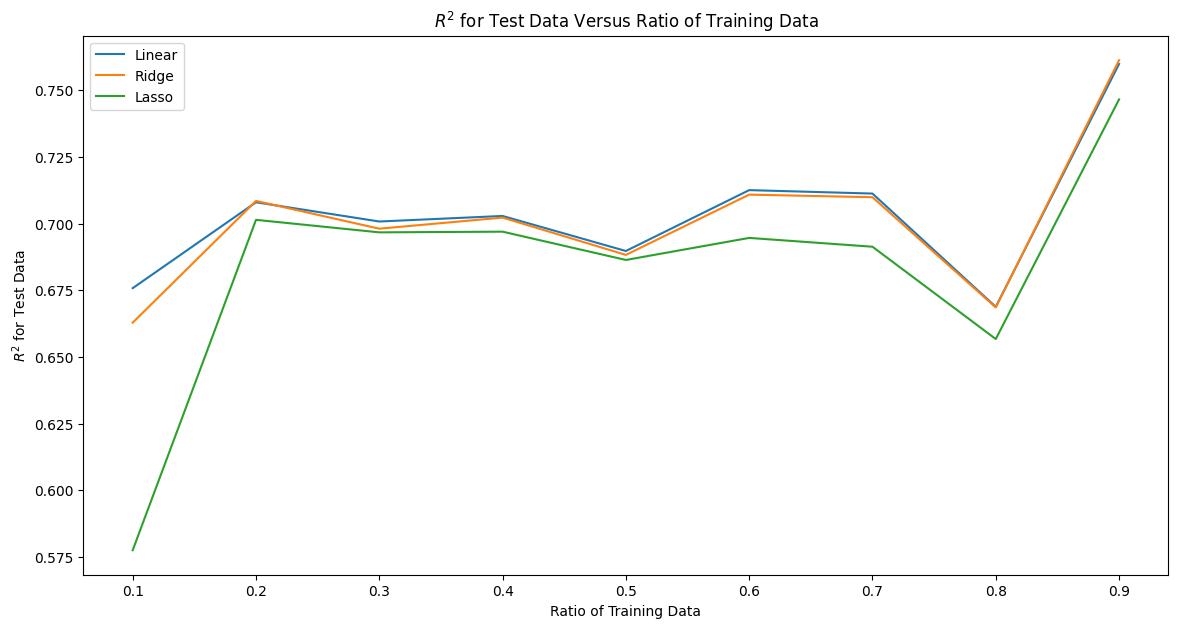

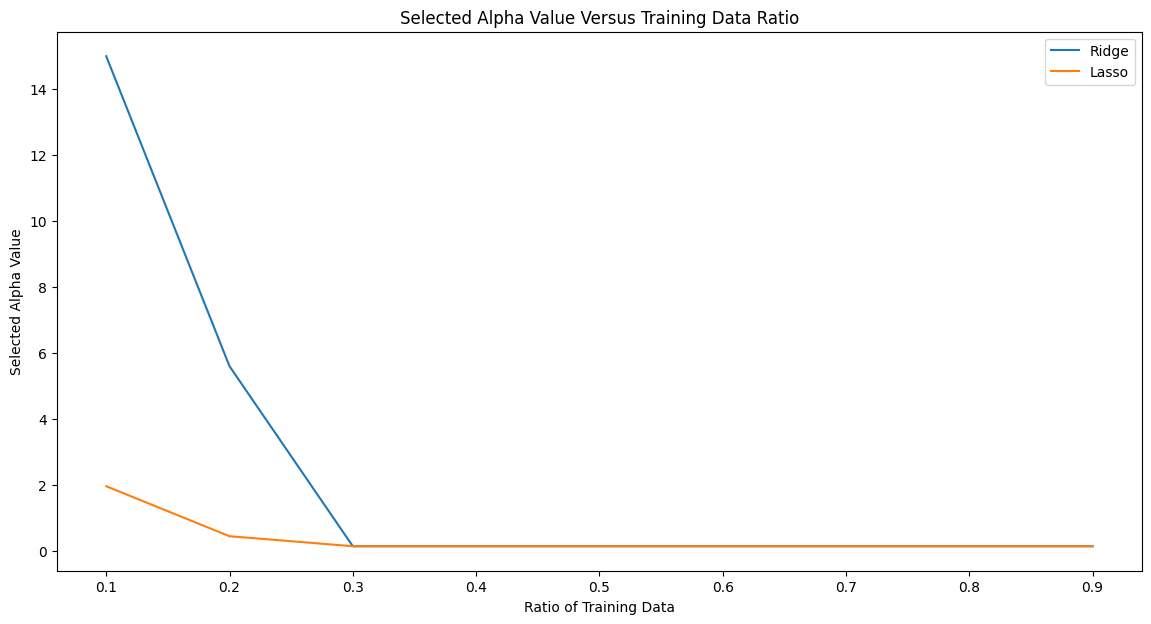

In [12]:
## Write you code here ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Create the alphas parameter for Ridge and Lasso
alphas = 10*np.abs(np.linspace(3,-3,100))*0.5

# Initialize lists to store metrics and alphas
r2_scores = {'Linear': [], 'Ridge': [], 'Lasso': []}
selected_alphas = {'Ridge': [], 'Lasso': []}

# Define the training set ratios
train_ratios = np.linspace(0.1, 0.9, 9)

# For each ratio, fit the models and calculate the metrics
for ratio in train_ratios:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Train a Linear Regression model and calculate R^2 for the test set
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    r2_scores['Linear'].append(r2_score(y_test, model_linear.predict(X_test)))

    # Train a Ridge Regression model and calculate R^2 for the test set
    model_ridge = RidgeCV(alphas=alphas)
    model_ridge.fit(X_train, y_train)
    r2_scores['Ridge'].append(r2_score(y_test, model_ridge.predict(X_test)))
    selected_alphas['Ridge'].append(model_ridge.alpha_)

    # Train a Lasso Regression model and calculate R^2 for the test set
    model_lasso = LassoCV(alphas=alphas)
    model_lasso.fit(X_train, y_train)
    r2_scores['Lasso'].append(r2_score(y_test, model_lasso.predict(X_test)))
    selected_alphas['Lasso'].append(model_lasso.alpha_)

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(14, 7))
for model, scores in r2_scores.items():
    plt.plot(train_ratios, scores, label=model)
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ for Test Data')
plt.title('$R^2$ for Test Data Versus Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected alpha value versus training data ratio
plt.figure(figsize=(14, 7))
for model, alphas in selected_alphas.items():
    plt.plot(train_ratios, alphas, label=model)
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value Versus Training Data Ratio')
plt.legend()
plt.show()
